# Design and Analysis of Experiments and Observational Studies using R -- A textbook workbook

## Welcome




## Chapter 1

In [26]:

library(tidyverse)
library(patchwork)

## CHAPTER 2

### Example 2.1

In [27]:
nhefshwdat1_filepath <-
  scidesignR::scidesignR_example("nhefshwdat1.csv")
nhefsdf <- read.csv(nhefshwdat1_filepath)
head(nhefsdf[1:6], n = 3)

colnames(nhefsdf)

 [1] "X"              "seqn"           "age"            "sex"            "race"           "education.code" "smokeintensity"
 [8] "smokeyrs"       "exercise"       "active"         "wt71"           "qsmk"           "wt82_71"        "pqsmkobs"      
[15] "strat1"         "strat2"         "strat3"         "strat4"         "strat5"         "stratvar"      

### Example 2.2

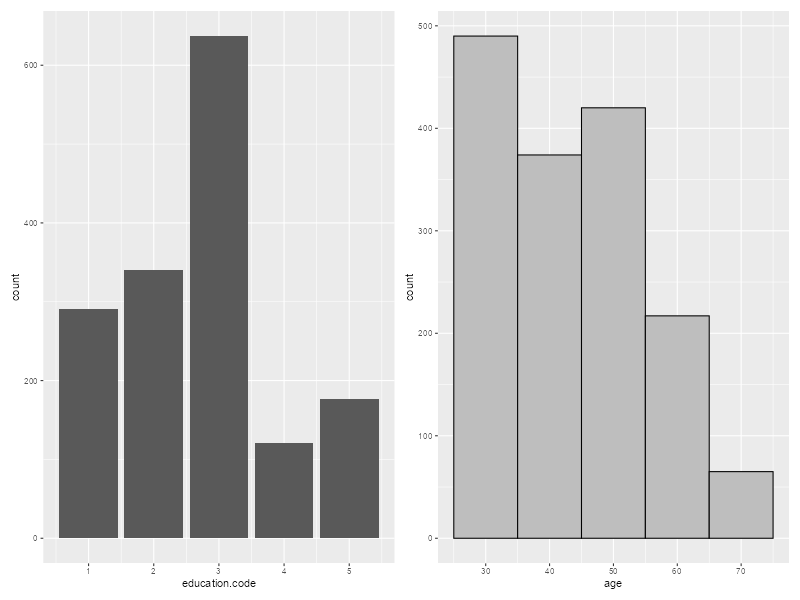

In [28]:
levels(as.factor(nhefsdf$education.code))

edcode <- dplyr::recode(
  as.factor(nhefsdf$education.code),
  "5" = 1,
  "4" = 1,
  "3" = 0,
  "2" = 0,
  "1" = 0
)
levels(as.factor(edcode))

nhefsdf %>%
  count(education.code) %>% 
  mutate(pct = round(n/sum(n)*100,2))

summarise(
  nhefsdf,
  N = n(),
  mean = mean(age),
  median = median(age),
  sd = sd(age)
)

barpl <- nhefsdf %>% 
  ggplot(aes(education.code)) +
  geom_bar()

histpl <- nhefsdf %>% 
  ggplot(aes(age)) +
  geom_histogram(binwidth = 10, colour = "black", fill = "grey")

barpl + histpl

### Example 2.3

In [29]:
set.seed(11)
gendf <- data.frame(trt = sample(c(rep("trt1", 5), rep("trt2", 5))),
                    value = sample(1:1000000, 10))
head(gendf, n = 3)

   trt  value
1 trt2 387134
2 trt1 900071
3 trt2 883541

### Example 2.4

In [30]:
set.seed(11)

expand.grid(subj = 1:3, treat = c("A", "B", "C")) %>% 
  mutate(run_order = sample(1:9)) %>% 
  arrange(run_order) %>% 
  head(n = 3)

  subj treat run_order
1    3     A         1
2    1     A         2
3    2     C         3